# Implementing Support vector Regressor on Admission Prediction Dataset with Performance Metrics

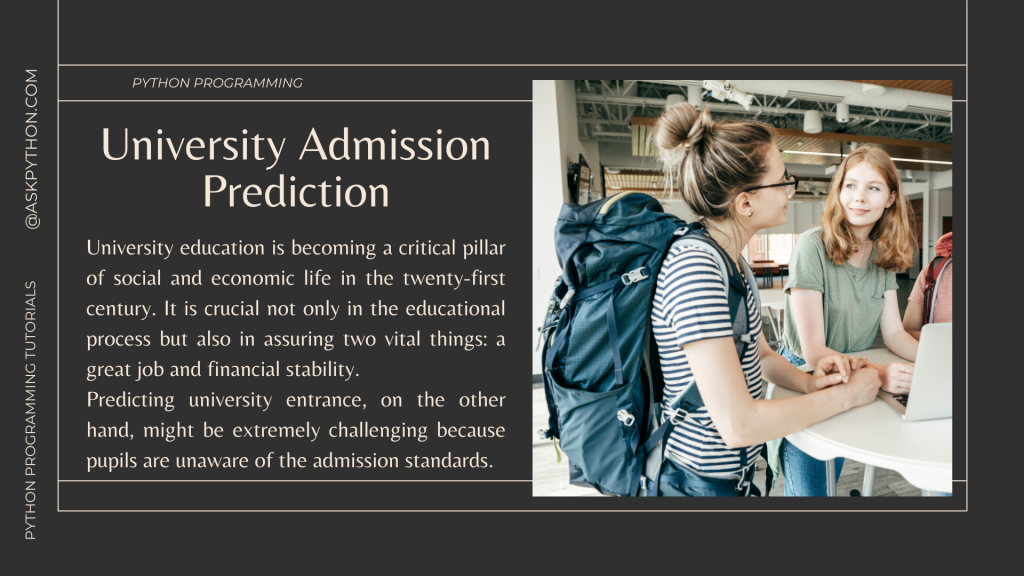

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('Admission.xlsx')
df

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# Checking for Null Values

In [3]:
df.isnull().sum()

Serial_No            0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR_                 0
CGPA                 0
Research             0
Chance_of_Admit_     0
dtype: int64

There are no null values in the dataset.

# Checking for Outliers

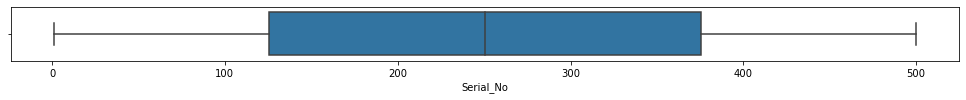

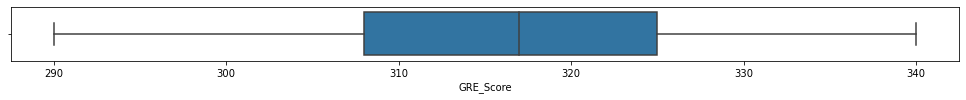

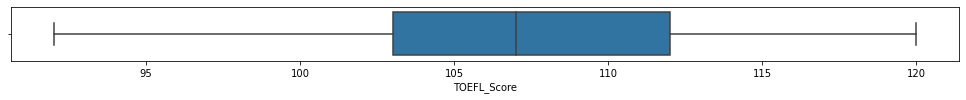

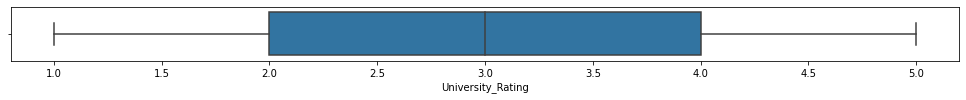

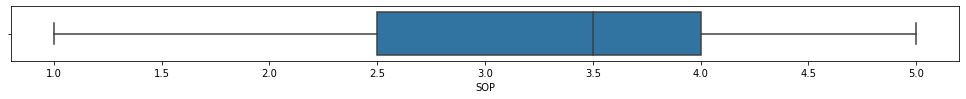

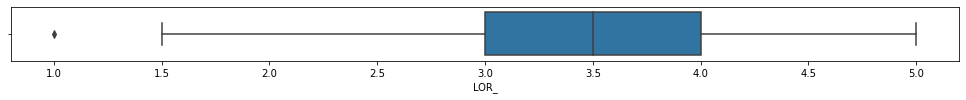

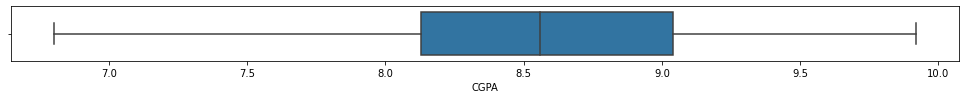

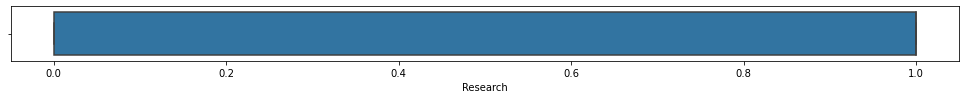

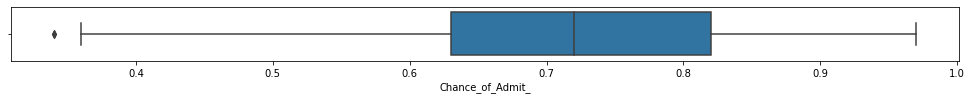

In [4]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

We can see that the number of outliers is very less. 

# Data Visualizatiion

C:\Users\Thanmai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Thanmai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Thanmai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

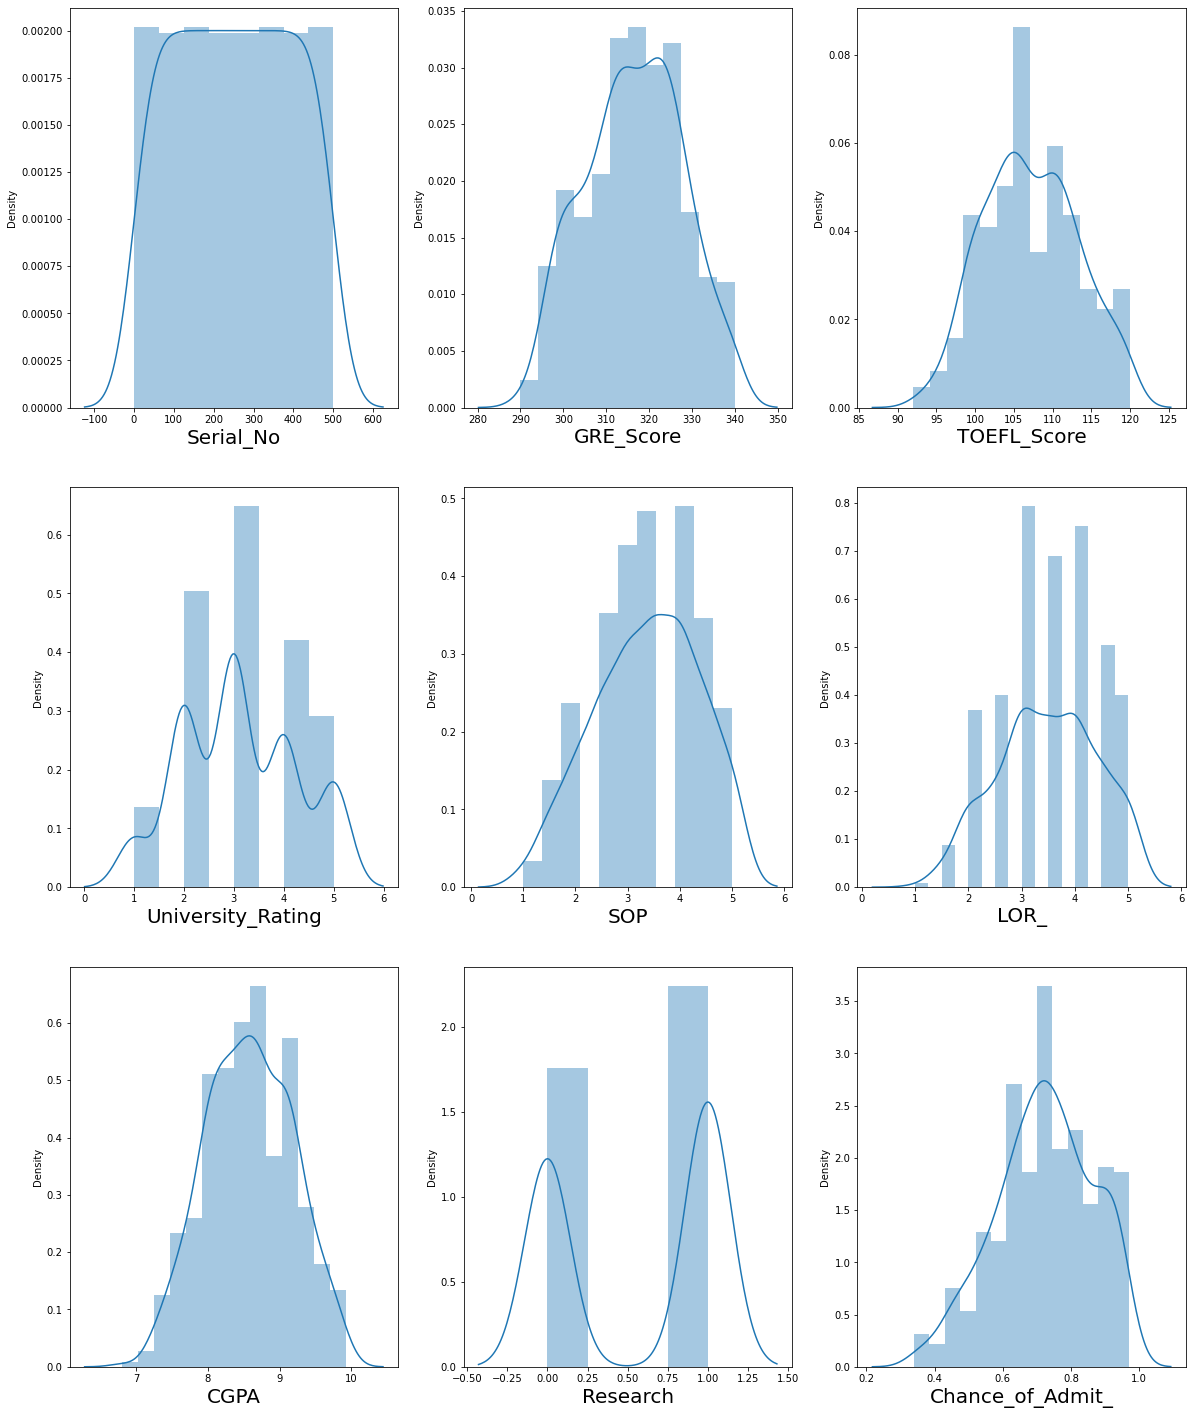

In [5]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [6]:
df.columns

Index(['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR_', 'CGPA', 'Research', 'Chance_of_Admit_'],
      dtype='object')

# Train Test Split

In [7]:
X = df.drop('Chance_of_Admit_', axis = 1)

In [8]:
y = df['Chance_of_Admit_']

In [9]:
X

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [10]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance_of_Admit_, Length: 500, dtype: float64

In [11]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(350, 8) (150, 8)
(350,) (150,)


# StandardScaler
StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale. 
As two columns are different in scale, they are Standardized to have common scale while building machine learning model.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train_transformed = scaler.fit_transform(X_train)
X_train_transformed

array([[-0.74148336,  1.33817011,  1.70355796, ..., -0.0688624 ,
         1.21608714,  0.84102145],
       [ 0.94289256, -1.46953039, -1.18460543, ..., -0.0688624 ,
        -0.57604127, -1.18903032],
       [-0.78324475, -0.24116142,  0.25947627, ...,  0.47890667,
         0.25485462,  0.84102145],
       ...,
       [-0.9085289 , -2.34693679, -0.54279134, ..., -1.16440052,
        -1.87940739, -1.18903032],
       [-1.39574508,  1.9523546 ,  1.86401148, ...,  0.47890667,
         1.77001774, -1.18903032],
       [-0.5257162 ,  0.46076371,  0.41992979, ...,  1.5744448 ,
         0.84136938,  0.84102145]])

In [15]:
X_test_transformed = scaler.transform(X_test)

# Support Vector Regression
Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.
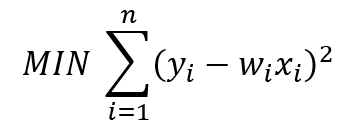
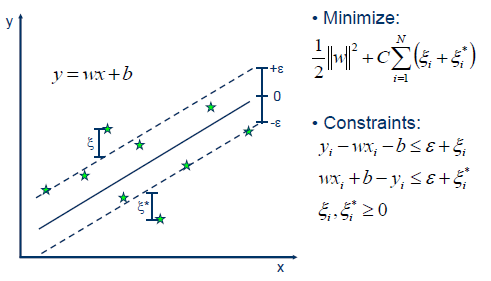

In [16]:
from sklearn.svm import SVR

In [18]:
regressor = SVR(kernel = 'rbf')

In [19]:
regressor.fit(X_train_transformed, y_train)

SVR()

In [20]:
y_pred = regressor.predict(X_test_transformed)

In [21]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset.head(10)

,Actual,Predicted
90,0.64,0.668291
254,0.85,0.793057
283,0.80,0.781945
445,0.91,0.838339
461,0.68,0.615930
15,0.54,0.514938
316,0.54,0.533269
489,0.65,0.692953
159,0.52,0.584531
153,0.79,0.675049


In [27]:
regressor.score(X_test, y_test)

-0.1834437438117762

# Performance Metrics
## Mean Squared Error: 
The Mean Squared Error or MSE calculates the squared error or in other words, the squared difference between the actual output and the predicted output for each sample. Sum them up and take their average.
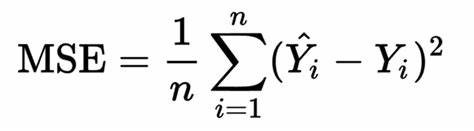
## Mean Absolute Error: 
Very similar to MSE but instead of squaring the distance, we take the absolute value of the error. We take the absolute value of the error rather than squaring it. Measures the average magnitude of the error across the predictions.
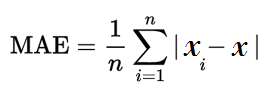
## Root Mean Square Error: 
Root mean square error is the square root of the mean square, which is the arithmetic mean of the squares of a group of values.
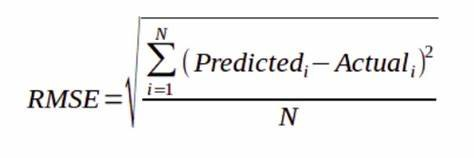

## R2:
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

## Adjusted R2:
Adjusted R2 is a corrected goodness-of-fit (model accuracy) measure for linear models. It identifies the percentage of variance in the target field that is explained by the input or inputs. R2 tends to optimistically estimate the fit of the linear regression.
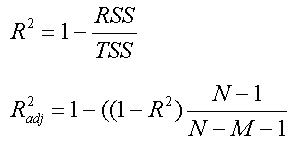

In [28]:
#Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_absolute_error(y_test, y_pred)))

0.004296182799024662
0.05149638576597008
0.2269281511094868


In [29]:
#R-squared & Adjusted R-Squared
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7645282105220794


In [30]:
#adjusted R square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7511681089914173